# Исследование продаж в интернет-магазине компьютерных игр. 

В нашем паспоряжении данные о продажах в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Откроем файл с данными и изучим общую информацию.

In [1]:
#импортируем библиотеки
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np  
import seaborn as sns 
from scipy import stats as st
data = pd.read_csv('/datasets/games.csv')
data.head(10) #выведем первые 10 строк датафрейма data на экран

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Изучим общую информацию о полученном датафрейме методом info() и используем метод describe( ) для получения сводки числовых значений в вашем наборе данных:

In [2]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [3]:
#проверим есть ли явные дубликаты
data.duplicated().sum()

0

**Описание данных**

•   *Name* — название игры

•   *Platform* — платформа

•	*Year_of_Release* — год выпуска

•	*Genre* — жанр игры

•	*NA_sales* — продажи в Северной Америке (миллионы проданных копий)

•	*EU_sales* — продажи в Европе (миллионы проданных копий)

•	*JP_sales* — продажи в Японии (миллионы проданных копий)

•	*Other_sales* — продажи в других странах (миллионы проданных копий)

•	*Critic_Score* — оценка критиков (максимум 100)

•	*User_Score* — оценка пользователей (максимум 10)

•	*Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.


**Изучив общую информацию в датафрейме, мы видим несколько проблем в исходных данных, а именно:**

- пропущенные значения в ряде столбцов;
- некорректный тип данных в некоторых столбцах
- также необходимо привести название столбцов к нижнему регистру

Подробно на этих проблемах оставновимся в разделе по предобработке данных, выясним причины их возникновения и обработаем там, где это будет корректно сделать и в зависимости от наших дальнейших задач.

### Предобработка данных.

**Изменение названий столбцов**

In [4]:
#приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Обработка пропущенных значений**

In [5]:
#Выведем количество пропущенных значений для каждого столбца
data.isna().sum() 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**Удалим строки с пропущенными значениями там, где они не многочисленны, а именно в :**
- name
- year_of_release
- genre

In [6]:
#удалим строки методом dropna()
data.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)

Посмотрим уникальные значения в оставшихся столбцах с пропусками :

In [7]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [8]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Мы видим, что аномальные значения отсутствуют. В столбце user_score есть значение 'tbd' (в переводе с англ. 'to be determined' - "Будет определено"), заменим его на Nan.
Заменить пропущенные значения в столбцах critic_score и user_score на медиану или удалить мы не можем, иначе это исказит наши данные, поэтому оставим их без изменений. Пропускам в столбце rating присвоим значение 'unknown' - неизвестно.

In [10]:
#с помощью метода replace() заменим значение 'tbd' на Nan и перезапишем в столбец user_score
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
#с помощью метода fillna() заменим пропущенные значения в столбце rating на 'unknown' и презепишем его 
data['rating'] = data['rating'].fillna('unknown')
#проверим пропуски еще раз
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Мы обработали пропуски, удалив строки с пропущенными значениями в столбцах:
- name
- year_of_release
- genre

Пропуски в столбце rating заменили на значение 'unknown' и изменили значение 'tbd' на Nan в столбце user_score.


**Изменение типов данных**

In [11]:
#заменим вещественный тип данных в столбце year_of_release на целочисленный с помощью метода astype()
data['year_of_release'] = data['year_of_release'].astype('int')
#переведем данные в столбце user_score из строкового типа в вещественный с помощью метода astype()
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец**

In [12]:
#сложим значения по каждому региону и запишем результат в новый столбец total_sales
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


Мы завершили предобработку данных. Привели названия столбцов к змеиному регистру, изменили типы данных в столбцах year_of_release и user_score для дальнейших расчетов. Также заменили пропуски, где это коррекно сделать, удалили строки с малочисленными пропусками и оставили пропуски там, где их невозможно заполнить, предварительно обосновав, что их замена приведет к искажению нашего анализа. Пропущенные значения могли возникнуть в результате некорректной выгрузки данных, либо если информация не была указана в открытых источниках, также пропуски в столбцах с оценками критиков и пользователей могли возникнуть, если данные игры не оценивались или набрали совсем небольшое количесво оценок (например, если это новинка или непопулярная игра, у нас нет точных данных, но, возможно, есть какой-то порог "входа"), значения в категории rating (рейтинг от организации ESRB , она определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию) могут быть пропущены по причине того, что данная организация присваивает рейтинг играм с определенного года (например,не рассматривает давно вышедшие) или используется не во всех регионах.

### Исследовательский анализ данных.

**Сколько игр выпускалось в разные годы?**

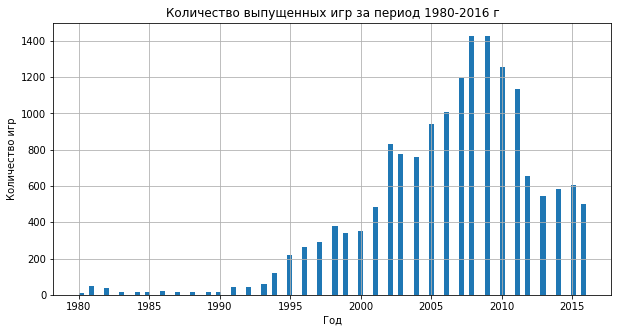

In [13]:
#построим гистограмму методом hist ()
data['year_of_release'].hist(bins=100, figsize=(10,5))
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.title('Количество выпущенных игр за период 1980-2016 г')
plt.show()

На графике видно, что до 1994 года выпускалось небольшое количество игр, технологии не так стремительно развивались. С 1995 видим рост, пик приходится на 2007-2011 гг. Спад начинается с 2012 года, возможно, это связано с тем, что с расширением технологических возможностей и перенасыщенностью рынка, на первый план выходит качество игры, детальная проработка, графика. Игры перестали "штамповать", т.е. упор делается не на скорость выпуска и количество. Релиз качественного, конкурентноспособного продукта требует больше времени. А также значение имеет тот факт, что развитие цифровой индустрии и выход множества игр на смартфонах вцелом снижают популярность игровых консолей.

**Как менялись продажи на разных платформах?**

Далее мы посмотрим, как менялись продажи по платформам. 
Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Также узнаем за какой характерный срок появляются новые и исчезают старые платформы.

In [14]:
#построим сводную таблицу для определения платформ с наибольшими суммарными продажами и сохраним ее в переменную platform_pivot
platform_pivot = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False)
platform_pivot

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


В явных лидерах видим 6 платформ: PS2, X360, PS3, Wii, DS, PS.

In [15]:
#создадим список методом index.tolist() и выведем его на экран
platform_top_six = platform_pivot.head(6).index.tolist()
platform_top_six

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

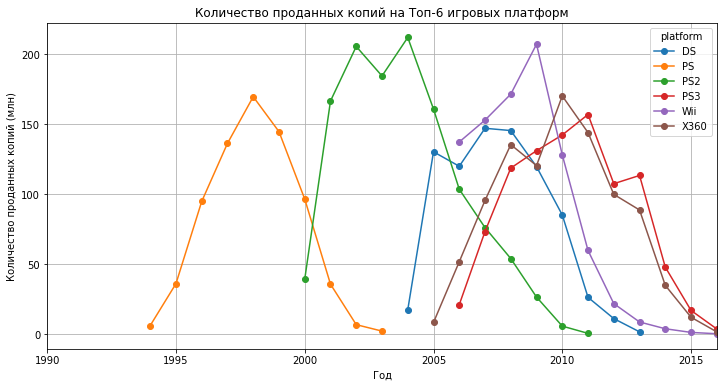

In [16]:
#построим распределение кол-ва продаж по годам для топ-6 платформ
(data
    .query('platform in @platform_top_six') #сделаем срез данных по нашим топ-6 платформам
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') #создадим сводную таблицу зависимости продаж от года 
    .plot(grid=True, figsize=(12,6),style='o-') #построим график для наглядности

)
plt.xlim(1990, 2016)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий (млн)')
plt.title('Количество проданных копий на Топ-6 игровых платформ')
plt.show()

На основании нашего графика, отображающего распределение количества продаж на популярных платформах в разные годы, можно сделать вывод, что "продолжительность жизни" платформы варьируется от 7 до 10 лет, "пик" популярности не держится при этом дольше 3-5 лет. Для нашего исследования нецелесообразно рассматривать платформы, которые были популярны в конце 90х- начале 2000х. В быстроразвивающейся и меняющейся индустрии оптимально рассматривать данные за последние несколько лет, поэтому актуальным периодом, на основании которого мы будем строить наш прогноз на 2017 год, будем считать период с 2013 по 2016 гг.

**Актуальный период. Какие платформы - лидеры продаж?**

Проверим, какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [17]:
#оставляем только актуальные данные в нашем датафрейме
data = data.query('year_of_release > 2012')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


In [18]:
#посмотрим на рейтинг платформ по количеству игр и суммой продаж за актуальный период
(data
    .groupby('platform').agg({'name': 'count','total_sales' : 'sum'})
    .sort_values(by='total_sales', ascending=False)
)

,name,total_sales
platform,,
PS4,392,314.14
PS3,345,181.43
XOne,247,159.32
3DS,303,143.25
X360,186,136.80
WiiU,115,64.63
PC,189,39.43
PSV,358,32.99
Wii,23,13.66


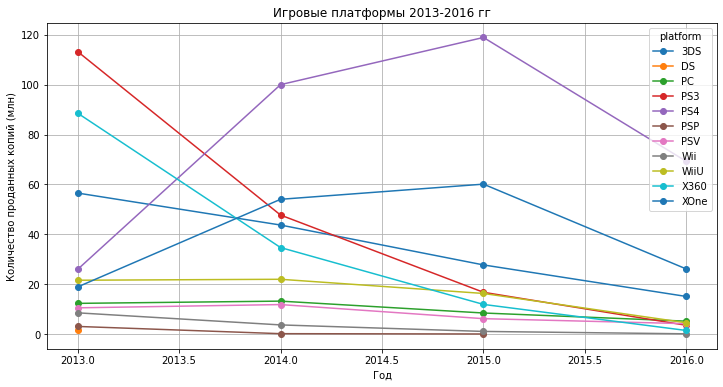

In [19]:
#создадим сводную таблицу зависимости суммарных продаж от года на каждой из платформ
(data
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') 
    .plot(grid=True, figsize=(12,6),style='o-') #построим график для наглядности

)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий (млн)')
plt.title('Игровые платформы 2013-2016 гг')
plt.show()

В период за 2013-2016 гг лидерами по продажам являются следующие платформы: PS4, PS3, X360, 3DS, XOne.
Но на графике мы видим, что к 2015 году PS3, X360 стремительно теряют свою популярность, платформа 3DS ведет себя более стабильно, но тоже теряет в продажах. За 2016 год данные неполные, поэтому на конец 2015 года мы видим две лидирущие и перспективные платформы, которые показывают рост - это PS4 и XOne, их можно считать потенциально самыми прибыльными.

**Глобальные продажи с разбивкой по платформам.**

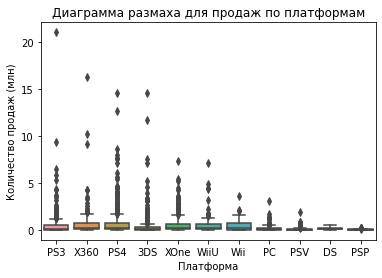

In [20]:
#построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
sns.boxplot(x='platform', y='total_sales', data=data)
sns.set(rc={'figure.figsize':(20,5)})
plt.xlabel('Платформа')
plt.ylabel('Количество продаж (млн)')
plt.title('Диаграмма размаха для продаж по платформам')
plt.show()

Получилось не очень наглядно, ниже изменим масштаб и посмотрим поближе. Но сначала интересно посмотреть, что за суперпопулярные игры представлены в выбросах.

In [21]:
#сделаем срез, ограничив общую сумму продаж по игре отметкой 8 млн копий
top_game=data.query('total_sales > 8').sort_values(by='total_sales', ascending=False)
top_game

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,unknown,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


Бесспорным лидером среди игр с большим отрывом становится Grand Theft Auto V, больше всего млн копий было продано на PS3 и X360, данная игра вышла на новую PS4 на год позже, но тоже попала в топ.
Это для нас наглядный пример, как одна игра может вывести в топ свой жанр, став хитом продаж, поэтому надо быть аккуратнее далее в разделе анализа топовых жанров.

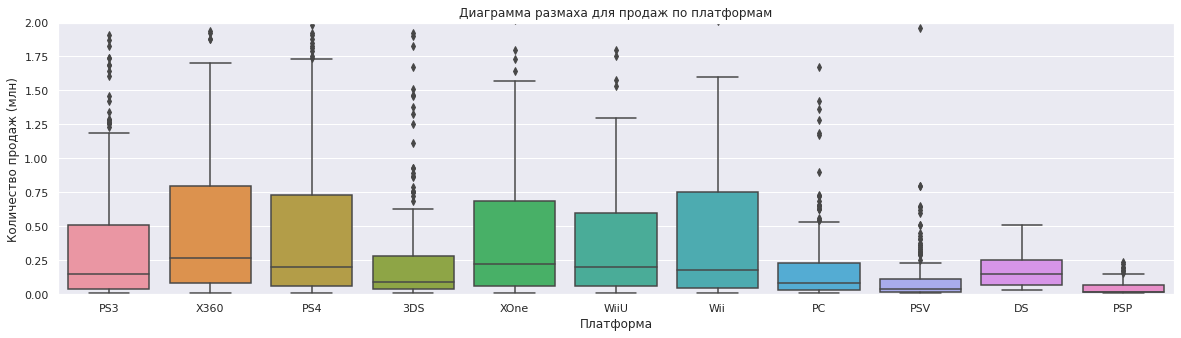

In [22]:
#укрупним наши «ящики с усами» 
sns.boxplot(x='platform', y='total_sales', data=data)
sns.set(rc={'figure.figsize':(20,5)})
plt.ylim(0,2)
plt.xlabel('Платформа')
plt.ylabel('Количество продаж (млн)')
plt.title('Диаграмма размаха для продаж по платформам')
plt.show()

На диаграмме размаха мы видим, что медианные значения у 6 платформ выше остальных и очень близки между собой, это: X360, PS4, PS3 (чуть отстает) , XOne, WiiU, Wii, однако, две из них не входят в наш топ по количеству суммарных продаж. И наоборот, у платформы 3DS , из топ-продаж, медианные продажи низкие. Почему так происходит? Всему виной наши выбросы, они - это топовые игры, благодаря которым платформа может вырваться в лидеры по количеству продаж, а если мегахиты не выпускаются для определенной платформы, то она остается "среднячком".

**Влияние отзывов пользователей и критиков на продажи на примере PS4.**

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

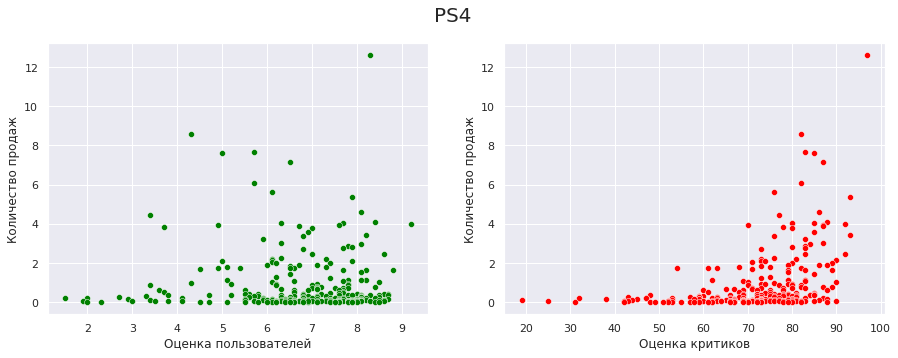

Коэффициент корреляции между отзывами пользователей и количеством продаж: -0.031957110204556376
Коэффициент корреляции между отзывами критиков и количеством продаж: 0.40656790206178095


In [23]:
#для примера возьмем PS4, рассмотрим корреляцию между отзывами и продажами, построим диаграмму рассеяния
ps4 = data.query('platform == "PS4"')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5)) #создаем фигуру «1×2», задаём размер
sns.scatterplot(x='user_score', y='total_sales', data=ps4, ax=ax[0], color='green')
sns.scatterplot(x='critic_score', y='total_sales', data=ps4, ax=ax[1], color='red')
fig.suptitle('PS4', fontsize=20) #указываем подзаголовок и его размер
ax[0].set(xlabel='Оценка пользователей') #называем оси x для каждого графика 
ax[1].set(xlabel='Оценка критиков')
ax[0].set(ylabel='Количество продаж') #называем оси y для каждого графика
ax[1].set(ylabel='Количество продаж')
plt.show()
  
#считаем коэффицент корреляции Пирсона
print('Коэффициент корреляции между отзывами пользователей и количеством продаж:', ps4['user_score'].corr(ps4['total_sales']))
print('Коэффициент корреляции между отзывами критиков и количеством продаж:', ps4['critic_score'].corr(ps4['total_sales']))

Благодаря нашему графику и рассчету коэффициента корреляции, мы выяснили, что между отзывами пользователей и количеством продаж внутри платформы PS4 линейная связь не прослеживается. А вот оценка критиков на продажи влияет, хотя все равно не так уж и сильно, но видим, что тенденция: "чем выше оценка критиков, тем больше продаж" присутствует.

**Сравнение результатов корреляционного анализа PS4 с другими платформами из топ-5, а именно: PS3, X360, 3DS, XOne.**

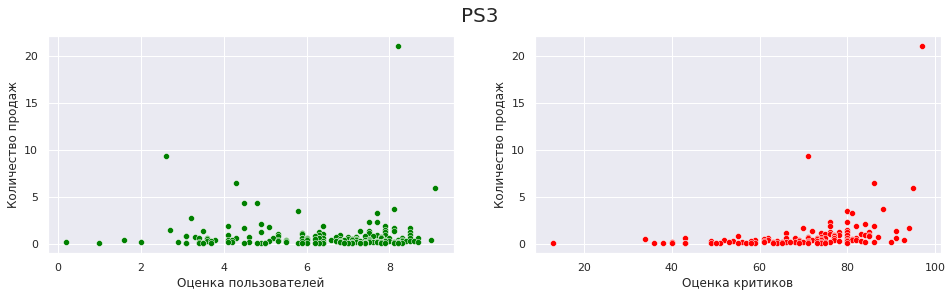

Коэффициент корреляции между отзывами пользователей и количеством продаж PS3 0.0023944027357566925
Коэффициент корреляции между отзывами критиков и количеством продаж PS3 0.3342853393371919


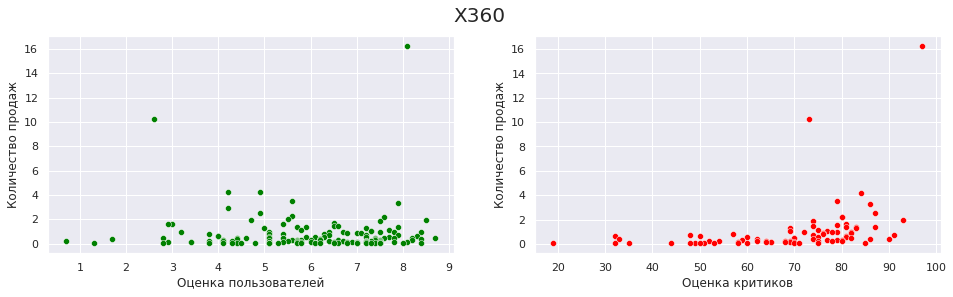

Коэффициент корреляции между отзывами пользователей и количеством продаж X360 -0.011742185147181342
Коэффициент корреляции между отзывами критиков и количеством продаж X360 0.3503445460228664


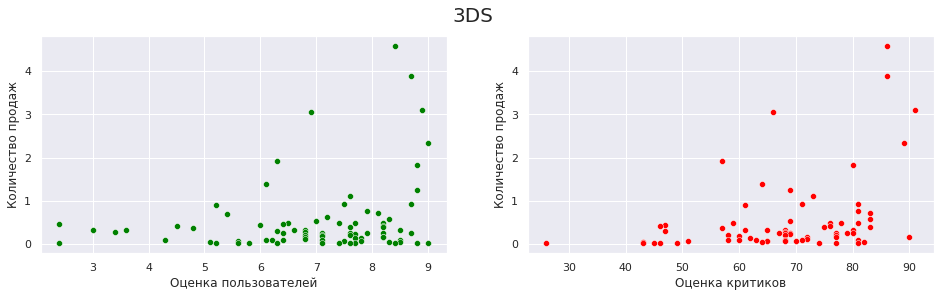

Коэффициент корреляции между отзывами пользователей и количеством продаж 3DS 0.24150411773563016
Коэффициент корреляции между отзывами критиков и количеством продаж 3DS 0.3570566142288103


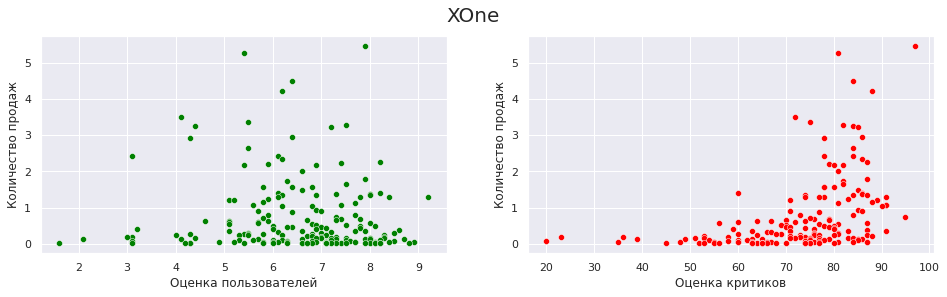

Коэффициент корреляции между отзывами пользователей и количеством продаж XOne -0.06892505328279414
Коэффициент корреляции между отзывами критиков и количеством продаж XOne 0.4169983280084017


In [24]:
#поместим игровые платформы (за исключением PS4) из топ-5 в список top_platforms_other
top_platforms_other = ['PS3', 'X360', '3DS', 'XOne']
#создадим собственную функцию для построения диаграмм рассеяния и расчета корреляции
def platform_matrix(platform_name):
    platform = data[data['platform']==platform_name]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4))#создаем фигуру «1×2», задаём размер
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0], color='green') #первый график с оценками пользователей
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1], color='red') #второй график с оценками критиков
    fig.suptitle(platform_name, fontsize=20) #указываем подзаголовок и его размер
    ax[0].set(xlabel='Оценка пользователей') #называем оси x для каждого графика 
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж') #называем оси y для каждого графика
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    critic_corr = platform['critic_score'].corr(platform['total_sales']) #считаем корреляцию между оценками критиков и количеством продаж
    user_corr = platform['user_score'].corr(platform['total_sales']) #считаем корреляцию между оценками пользователей и количеством продаж
    print('Коэффициент корреляции между отзывами пользователей и количеством продаж', platform_name, user_corr)
    print('Коэффициент корреляции между отзывами критиков и количеством продаж', platform_name, critic_corr)
for platform in top_platforms_other: #выводим все графики из списка с помощью цикла
    platform_matrix(platform)

Сравнивая полученные данные по PS4 и остальными популярными платформами, можем сделать вывод, что результаты схожи. По остальным платформам мы так же не нашли прямой зависимости между оценками пользователей и количеством продаж (и только у платформы 3DS прослеживается очень слабая прямая зависимость). Между оценками критиков и количеством продаж наблюдается слабая положительная зависимость, наибольшая взаимосвязь прослеживается у XOne, наименьшая - у PS3. Покупатели прислушиваются больше к критикам, чем к оценкам других пользователей.

**Распределние игр по жанрам.**

Посмотрим на общее распределение игр по жанрам. Что мы можем сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [25]:
#общее распределение игр по жанрам
data['genre'].value_counts()

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

Больше всего игр выпускается в жанре экшн, он лидирует с большим отрывом, далее идет жанр ролевых игр и замыкает тройку приключения. Посмотрим, а какой жанр самый прибыльный?

In [26]:
#нарисуем сводную таблицу и посмотрим суммарные и медианные значения продаж
(data
    .pivot_table(index='genre', values='total_sales', aggfunc=('median','sum','count'))
    .sort_values(by='sum', ascending=False)
)

,count,median,sum
genre,,,
Action,766,0.110,321.87
Shooter,187,0.450,232.98
Sports,214,0.240,150.65
Role-Playing,292,0.125,145.89
Misc,155,0.100,62.82
Platform,74,0.225,42.63
Racing,85,0.120,39.89
Fighting,80,0.125,35.31
Adventure,245,0.030,23.64


И тут жанр экшн лидирует по количеству суммарных продаж (здесь мы можем вспомнить GTA5, который как раз относится к данному жанру), но мы не можем составить топ-жанров, учитывая общее количество продаж, такую "кассу" могут собрать один-два хита внутри одного жанра, а нас интересуют средние показатели распределения. Поэтому построим для наглядности график с учетом медианных показателей и сделаем итоговые выводы. 

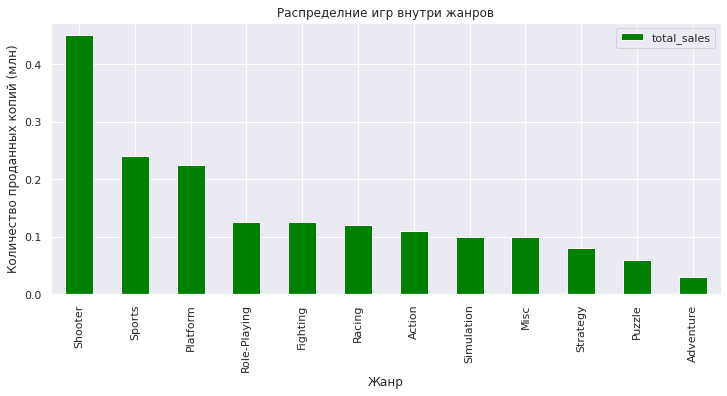

In [27]:
(data
    .pivot_table(index='genre', values='total_sales', aggfunc='median')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', figsize=(12, 5), color='green', grid=True)
)
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий (млн)')
plt.title('Распределние игр внутри жанров')
plt.show()

По медианным продажам первая **тройка лидеров** среди жанров выглядит так:
- Shooter
- Sports
- Platform

Самые **низкие продажи** у жанров:
- Strategy
- Puzzle
- Adventure

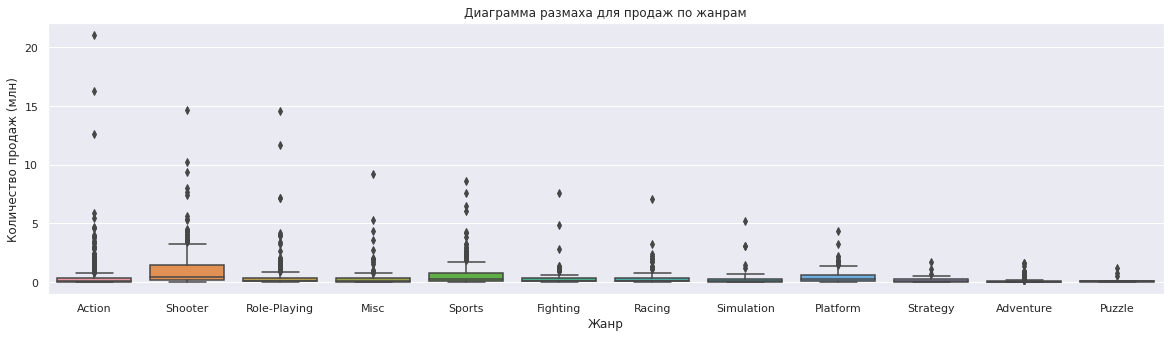

In [28]:
#построим диаграммы размаха по жанрам
sns.boxplot(x='genre', y='total_sales', data=data)
sns.set(rc={'figure.figsize':(20,5)})
plt.xlabel('Жанр')
plt.ylabel('Количество продаж (млн)')
plt.title('Диаграмма размаха для продаж по жанрам')
plt.show()

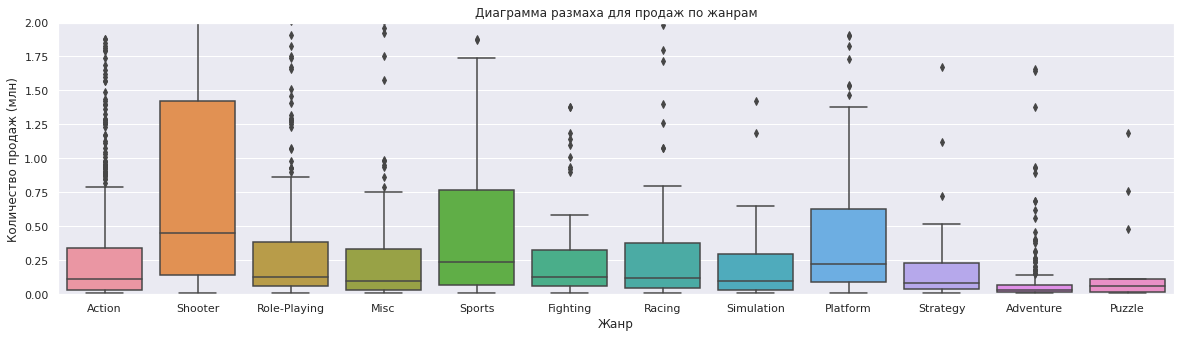

In [29]:
#для наглядности укрупним, обрезав выбросы
sns.boxplot(x='genre', y='total_sales', data=data)
sns.set(rc={'figure.figsize':(20,5)})
plt.ylim(0,2)
plt.xlabel('Жанр')
plt.ylabel('Количество продаж (млн)')
plt.title('Диаграмма размаха для продаж по жанрам')
plt.show()

Посмотрев на выбросы, мы можем прийти к выводу, что чаще всего хитовые игры появляются в жанрах Action, Shooter, Sports и  Role-Playing и приносят больше всего суммарных продаж. Проанализировав медианные значения, мы видим, что в среднем больше продаж приносят игры в жанре Shooter при чем с большим отрывом от остальных, второе и третье место у жанра Sports и Platform соответсвенно.
Меньше всего продаж приносят жанры Strategy, Adventure (несмотря на то, что игр в этом жанре выпускается много, видимо, подавляющее большинство из них совсем непопулярны) и Puzzle.

Подводя итог, выведу свой рейтинг **Топ-5 жанров**, который в первую очередь основывается на медианных продажах, но также учитывает и суммарные продажи, то есть жанры, где чаще всего выходят хитовые игры:

- Shotter
- Sports
- Platform
- Role-Playing
- Action

Жанры Fighting, Racing, Misc можем отнести к стабильным, показывающим средний уровень прибыли.

**Вывод**

Мы провели исследовательский анализ данных по бщему количеству продаж и пришли к следующим выводам:

- актуальным периодом, на основании которого мы строим наш прогноз, будем считать последние несколько лет, а именно с 2013 по 2016 год ввиду того, что технологии быстро меняются и предпочтения тоже;
- выяснили, что в среднем игровая платформа существует 7-10 лет, а пик приходится на первые 3-4 года;
- лидерами по продажам мы можем назвать следующие платформы: PS4, PS3, X360, 3DS, XOne, при этом PS4 и XOne считаем потенциально самыми прибыльными
- также выяснили, что отзывы пользователей на продажи никак не влияют, при этом отзывы критиков имеют влияние на количество продаж, однако, эта зависимость не очень сильная
- выделили самые прибыльные жанры: Shotter, Sports, Platform, Role-Playing, Action.   
Жанры Fighting, Racing, Misc можем отнести к стабильным, показывающим средний уровень прибыли. Strategy и Puzzle наименее популярны и приносят меньше всего прибыли.

### Портрет пользователя для каждого региона.

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?


**Топ-5 платформ для каждого региона.**

In [30]:
#создадим список с регионами и посмотрим, насколько отличается общее количество продаж по регионам
regions = ['na_sales', 'eu_sales', 'jp_sales']
data[regions].sum()

na_sales    437.71
eu_sales    392.23
jp_sales    140.78
dtype: float64

В Северной Америке больше всего продаж, Европа ей уступает совсем немного, доля Японии значительно меньше.

In [31]:
#сгруппируем данные по платформам и посчитаем суммарные продажи в каждом регионе, отсортируем в порядке убывания по одному из регионов
data.groupby(['platform']).agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'}).sort_values(by='na_sales', ascending=False)

,na_sales,eu_sales,jp_sales
platform,,,
PS4,108.74,141.09,15.96
XOne,93.12,51.59,0.34
X360,81.66,42.52,0.51
PS3,63.50,67.81,23.35
3DS,38.20,30.96,67.81
WiiU,29.21,19.85,10.88
PC,11.11,25.36,0.00
Wii,6.56,5.93,0.05
PSV,5.04,6.10,18.59


Мы видим, что популярность платформ отличается в зависимости от региона, для наглядности построим круговые диаграммы по топ-5 платформ для каждого региона и сделаем выводы.

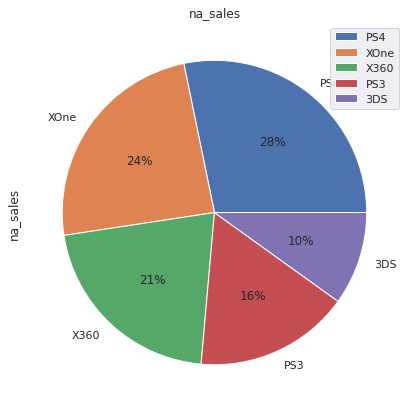

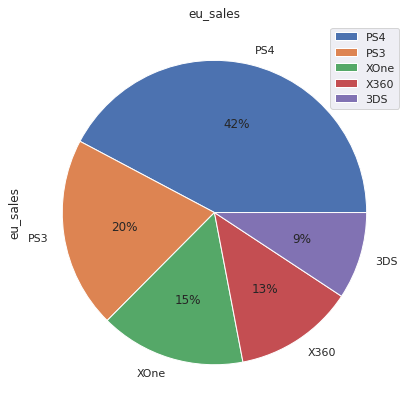

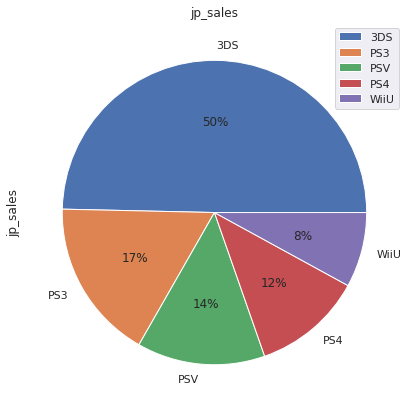

In [32]:
#с помощью цикла построим круговые диаграммы для каждого региона с разбивкой на топ-5 платформ
for region in regions:
    (data
         .pivot_table(index='platform', values=region, aggfunc='sum')
         .sort_values(region,ascending=False).head(5)
         .plot(kind='pie', y=region, autopct='%1.0f%%', title = region, figsize=(7,7))
    )


Итак, что мы можем сказать о топ-5 платформ по каждому региону?
Для Северной Америки и Европы топ-5 состоит из одинаковых платформ, но они имеют разное процентное распределение. В Северной Америке наибольшую популярность имеет платформа PS4, следом идет XOne с небольшим отрывом, в Европе платформа PS4 уверенно лидирует, второе место занимает PS3. А вот специфика Японии совсем иная, там почти 50% от всех продаж приходится на 3DS, также в топе Японии присутствует платформа PSV и WiiU, которых нет в топ-5 платформ Америки и Европы.

**Топ-5 жанров для каждого региона.**

In [33]:
#сгруппируем данные по жанру и посчитаем общую колличество продаж для каждого региона
data.groupby(['genre']).agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'}).sort_values(by='na_sales', ascending=False)

,na_sales,eu_sales,jp_sales
genre,,,
Action,126.05,118.13,40.49
Shooter,109.74,87.86,6.61
Sports,65.27,60.52,5.41
Role-Playing,46.40,36.97,51.04
Misc,27.49,20.04,9.20
Platform,18.14,15.58,4.79
Fighting,15.55,8.55,7.65
Racing,12.96,20.19,2.30
Adventure,7.14,8.25,5.82


По суммарным продажам В Северной Америке и Европе лидирует жанр Action и Shooter, а в Японии - Role-Playing и Action. Но окончательные выводы по популярным жанрам, мы будем делать по медиане, а не суммарным значениям. Построим графики для наглядности.

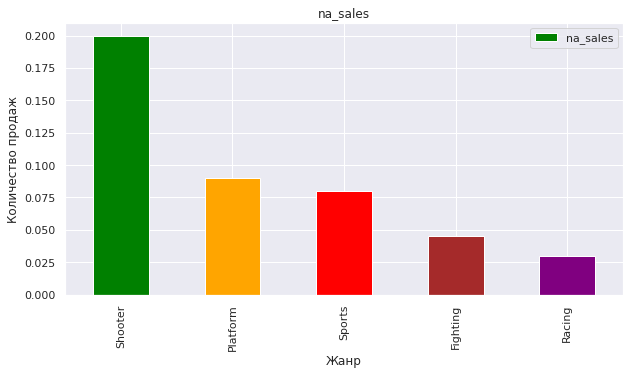

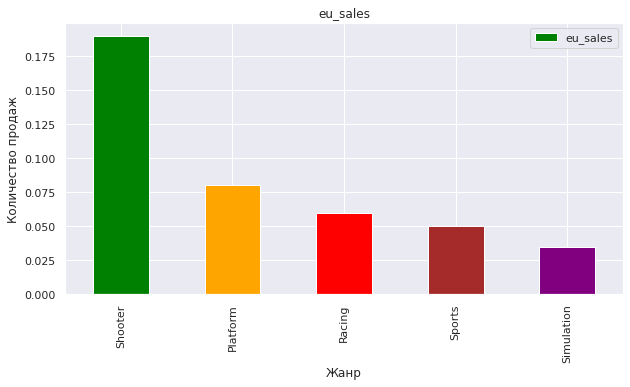

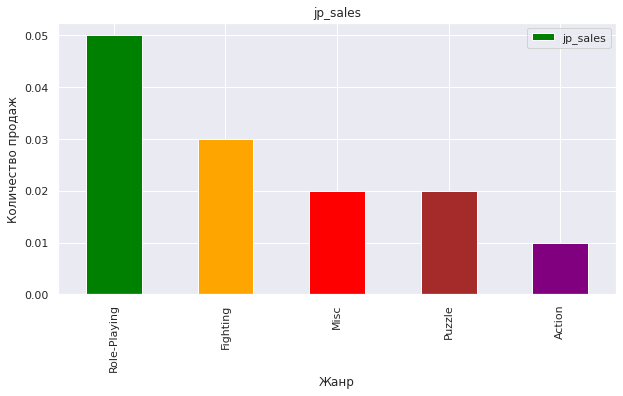

In [34]:
for region in regions:
    (data
         .pivot_table(index='genre', values=region, aggfunc='median')
         .sort_values(region,ascending=False).head(5)
         .plot(kind='bar', y=region, title=region, figsize=(10,5), color=['green','orange','red','brown','purple'])
    )
    plt.xlabel('Жанр')
    plt.ylabel('Количество продаж')

Мы построили графики и выяснили, что в каждом регионе есть своя специфика и лидеры среди жанров, опять же мы видим, что в Северной Америке и Европе ситуация схожа по лидерам, а в Японии сильно отличается:

**Северная Америка**
- Shooter (лидирует с большим отрывом)
- Platform 
- Sports
- Fighting
- Racing

**Европа**
- Shooter (так же в лидерах с большим преимуществом)
- Platform
- Racing
- Sports
- Simulation

**Япония**
- Role-Playing (лидер с большим отрывом)
- Fighting
- Misc
- Puzzle
- Action

Лидеры жанров были выведены по медианным значениям, но не стоит забывать, что по суммарным значениям В Америке и Европе лидирует жанр Action и Shooter, а в Японии - Role-Playing и Action.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [35]:
#посмотрим уникальные значения в столбце рейтинг и как они распределены
data['rating'].value_counts()

unknown    977
M          369
T          333
E          302
E10+       252
Name: rating, dtype: int64

**Расшифровка рейтинга ESRB:**
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для лиц старше 10 лет»
- «T» («Teen») — «Для лиц старше 13 лет»
- «M» («Mature») — «От 17 лет»
- unknown - категория не определена

In [36]:
#сгруппируем данные по каждому региону
data.groupby(['rating']).agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'}).sort_values(by='na_sales', ascending=False)

,na_sales,eu_sales,jp_sales
rating,,,
M,165.21,145.32,14.11
unknown,89.42,78.91,85.05
E,79.05,83.36,15.14
E10+,54.24,42.69,5.89
T,49.79,41.95,20.59


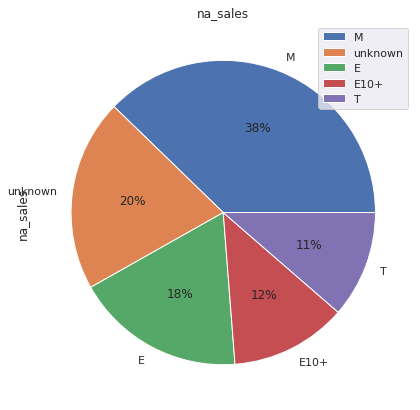

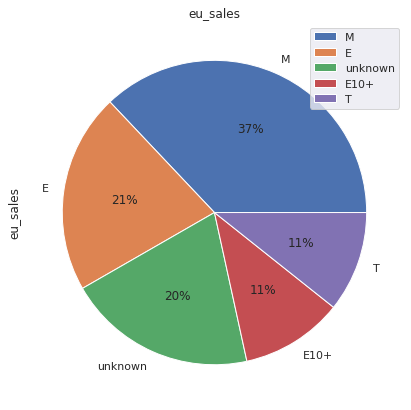

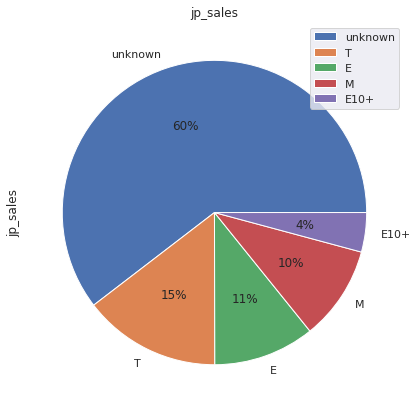

In [37]:
#построим круговые диграммы и посмотрим распределение в % соотношении по каждому региону
for region in regions:
    (data
         .pivot_table(index='rating', values=region, aggfunc='sum')
         .sort_values(region,ascending=False)
         .plot(kind='pie', y=region, autopct='%1.0f%%', title = region, figsize=(7,7))
    )

В Северной Америке и Европе ситуация по рейтингам схожая, 37-38% от всех продаж приходится на игры для взрослых в категории 17+, на втором и третьем местах игры либо без категории, либо с категорией "для всех", меньше всего продаж игр в категории для детей и подростков.

В Японии подавляющее большинство игр , а именно 60% от всех продаж, без категории, следом идут игры для подростков, далее категории "для всех" и для лиц старше 17 лет (они имеют примерно одинаковое соотношение 10-11%), меньше всего игр продаются для детей в категории 10+. 

**Итоговый портрет пользователей по каждому региону.**

Портреты пользователей **Америки и Европы** очень схожи:

- Самой популярной платформой является PS4 (но в Европе она лидирует с большим отрывом от остальных), замыкает топ-5 платформа 3DS, между ними показывают хорошие продажи игры для платформ (с небольшой разницей в распределении): XOne, PS3 и X360
- Наиболее популярными являются жанры Shooter и Platform. В Америке также в топ-5 входят жанры Sports, Fighting, Racing, а в Европе- Racing, Sports, Simulation. Но по суммарным продажам лидирует жанр Action благодаря мегахиту GTA5.
- Что касается возрастных ограничений, большая доля продаж приходится на рейтинг M (Mature 17+) — от 17 лет, далее по популярности рейтинг "для всех" и "не определен", меньше всего продаж в категории для детей и подростков.

Портрет пользователей **Японии** значительно отличается:

- Самой популярной платформой с большим отрывом от остальных стала 3Ds от Nintendo, также в топ-5 вошли: PS3, PSV, PS4 и WiiU
- Из жанров с большим преимуществом лидирует Role-Playing, следом идут: Fighting, Misc, Puzzle и Action (занимает второе место по суммарным продажам)
- Большинство игр продается без указания возрастной категории, следом идут игры для подростков, далее категория "для всех" и для лиц старше 17 лет (они имеют примерно одинаковое соотношение 10-11%), меньше всего игр продаются для детей в категории 10+

### Проверка гипотез.

**Проверим две гипотезы:**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

- H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.


In [38]:
#сохраним данные по платформам в две переменные XOne и PC
xone = data.loc[(data['platform']=='XOne')&(data['user_score'].notna()), 'user_score']
pc = data.loc[(data['platform']=='PC')&(data['user_score'].notna()), 'user_score']
#чтобы нам понимать, какое значение присваивать аргументу equal_var , проверим равны ли дисперсии выборок
print("Дисперсия по XOne",np.var(xone))
print("Дисперсия по PC",np.var(pc))

Дисперсия по XOne 1.8965188383045526
Дисперсия по PC 3.016306347554631


In [39]:
#для проверки гипотезы о равенстве средних надо использовать ttest_ind()
alpha=0.01 #если p-value окажется меньше, отвергнем гипотезу
results = st.ttest_ind(xone, pc, equal_var=False)
print('р-значение', results.pvalue)
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Мы не смогли отвергнуть нулевую гипотезу, а значит нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**
- H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- H1: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [40]:
#сохраним данные по жанрам в две переменные action и sports
action= data.loc[(data['genre']=='Action')&(data['user_score'].notna()), 'user_score']
sports = data.loc[(data['genre']=='Sports')&(data['user_score'].notna()), 'user_score']
#чтобы нам понимать, какое значение присваивать аргументу equal_var , проверим равны ли дисперсии выборок
print("Дисперсия по жанру Action",np.var(action))
print("Дисперсия по жанру Sports",np.var(sports))

Дисперсия по жанру Action 1.7648124186332366
Дисперсия по жанру Sports 3.160733984375


In [41]:
#для проверки гипотезы о равенстве средних надо использовать ttest_ind()
alpha=0.01 #если p-value окажется меньше, отвергнем гипотезу
results = st.ttest_ind(action, sports, equal_var=False)
print('р-значение', results.pvalue)
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Нулевая гипотеза о равенстве средних оценок жанров Action и Sports отвергается.

### Общий вывод.

Нами было проведено масштабное исследование рынка игровой индустрии для прогнозирования наиболее прибыльных ниш на 2017 год.  Мы смогли выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Подведем итоговые результаты и дадим рекомендации.**

- Мы выяснили, что пик популярности игр и бум выпуска новых приходился на 2007-2011 гг, после чего видим снижение. Развитие технологий и перенасыщенность рынка привели к тому, что главным фактором стало качество выпускаемых игр, а не их количество (что требует гораздо больше времени), а также фокус внимания сместился на мобильную индустрию и развитие игр на смартфонах.
- Актуальным периодом, на основании которого мы строим прогнозы на 2017 год, установили 2013 - 2016 гг, в данной индустрии все стремительно меняется и мы не можем основываться на данных старше 3 лет.
- Выяснили, что в среднем игровая платформа существует 7-10 лет, а пик приходится на первые 3-4 года
- В период за 2013-2016 гг лидерами по продажам являются следующие платформы: PS4, PS3, X360, 3DS, XOne. 

На конец 2015 года мы видим две лидирующие и перспективные платформы, которые показывают рост , они вышли на рынок относительно недавно - это PS4 и XOne, их можно считать потенциально самыми прибыльными.
- Также выяснили, что отзывы пользователей на продажи никак не влияют, при этом отзывы критиков имеют влияние на количество продаж, однако, эта зависимость не очень сильная.
- Стабильно самыми прибыльными жанрами являются Shotter, Sports, Platform, а также Role-Playing. Но стоит обратить внимание на жанр Action, игры в котором в среднем не показывают выдающихся результатов, но суммарные продажи лидируют с большим отрывом благодаря топовым играм, которые выходят в этом жанре.
- Регионы Северная Америка и Европа очень схожи по своим предпочтениям по жанрам игр и платформам, Япония от них существенно отличается.
- Больше всего продаж приходится на игры с рейтингом для взрослых и для всех.
- Япония – отдельный рынок с уклоном в портативные консоли и ролевые игры. Объём продаж в этой стране в 2.5 раза меньше показателей Европы и Америки.

**Рекомендации.**
Основное, что мы предлагаем - принять разные стратегии по повышению продаж в регионах в зависимости от портрета среднестатистического пользователя каждого региона.

- Планируя рекламную кампанию на следующий год, стоит уделить особое внимание играм следующих жанров:

**Shooter** По ним наблюдаются самые высокие средние продажи в Северной Америке и Европе

**Action** В данном жанре мы видим максимальные суммарные продажи по всем регионам, но средние продажи довольно посредственные.  Но именно в этом жанре с большей вероятностью могут появится игры-хиты, например, новая часть GTA.

**Sports** Стабильные суммарные и средние продажи в Европе и Америке.

**Role-Playing** Высокие продажи в Японии , стабильные продажи в Америке и Европе.

- Касаемо платформ, имеет смысл сосредоточиться на следующих потенциально прибыльных:

**PS4** Новинка, находится на взлёте. Популярна во всех регионах.

**Xbox One** Новинка, также на взлёте. Популярна в Америке и Европе.

**3DS** В случае отдельной рекламной кампании для Японии. 

- При планировании рекламной кампании учитывать отзывы пользователей и критиков смысла большого нет, связь между отзывами и продажами либо не была выявлена, либо была довольно слабой.
- Учитывать, что в Европе и Америке больше всего продаж игр в категории 17+, в Японии большинство же игр продает без указания возрастной категории.
